In [2]:
import pylab as pl
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import time

import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 4.0)

from mxnet import nd
from mxnet import nd, gluon, init, autograd
import mxnet as mx

from __future__ import print_function

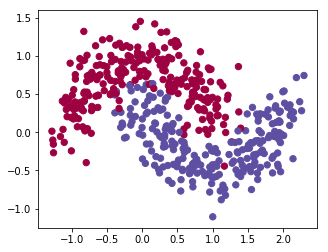

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(500, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
y = np.expand_dims(y, axis=1).astype(np.float32)
X = X.astype(np.float32)
plt.show()

# Let us also define a function to plot decision boundary
def plot_decision_boundary(net):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    data = mx.nd.array(np.c_[xx.ravel(), yy.ravel()])
    Z = net(data) > 0
    Z = np.squeeze(Z.asnumpy().astype(int))
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(y), cmap=plt.cm.Spectral)

In [5]:
print(X.shape, y.shape)
train_Arraydata = gluon.data.ArrayDataset(X, y)
batch_size = 3                                   
train_data = gluon.data.DataLoader(train_Arraydata, batch_size=batch_size, shuffle=True)

(500, 2) (500, 1)


In [6]:
for i, (data, label) in enumerate(train_data):
    print(data, label)
    break


[[-0.06802063  0.5868551 ]
 [ 1.6019052  -0.39122677]
 [ 0.33955574  0.9145837 ]]
<NDArray 3x2 @cpu(0)> 
[[1.]
 [1.]
 [0.]]
<NDArray 3x1 @cpu(0)>


In [10]:
model_ctx = mx.cpu()

# Network
net = gluon.nn.Dense(1) #Also serves as the prediction routine

# Loss Function
log_loss = gluon.loss.SigmoidBinaryCrossEntropyLoss() #Also serves as the loss function routine

# Initialize hyperparameters
learning_rate = 0.1
epochs = 15

# Initialize parameters
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx) 

# SGD (Additional Step for MXNet)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate, 'wd': 0.00})

# Others
loss_sequence = []
num_examples = len(X)

# Training with mini-match gradient descend
for e in range(epochs):
    cumulative_loss = 0
    # Mini-batches
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        
        # Forward pass with automatic gradient computation
        with autograd.record():
            output = net(data)
            loss = log_loss(output, label)
        
        # Backward pass
        loss.backward()
        
        # Update the parameters
        trainer.step(batch_size)
        
        cumulative_loss += nd.sum(loss).asscalar()
        
    print("Epoch %s, loss: %s" % (e, cumulative_loss ))
    loss_sequence.append(cumulative_loss)


Epoch 0, loss: 258.7599360346794
Epoch 1, loss: 167.11577093601227
Epoch 2, loss: 158.9981718659401
Epoch 3, loss: 154.86561107635498
Epoch 4, loss: 152.54531210660934
Epoch 5, loss: 150.75126206874847
Epoch 6, loss: 150.53787004947662
Epoch 7, loss: 149.6425660252571
Epoch 8, loss: 149.23536145687103
Epoch 9, loss: 148.9495787024498
Epoch 10, loss: 148.85979449748993
Epoch 11, loss: 148.17213714122772
Epoch 12, loss: 148.86110270023346
Epoch 13, loss: 148.34750521183014
Epoch 14, loss: 148.25724440813065


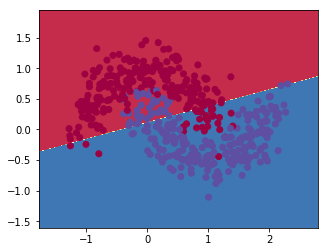

In [12]:
plot_decision_boundary(net)

In [17]:
# We change only the Network
num_hidden = 10
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(num_hidden, activation="tanh"))
    #net.add(gluon.nn.Dense(num_hidden, activation="tanh"))
    net.add(gluon.nn.Dense(1))

# Other things remain the same.
model_ctx = mx.cpu()
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx) 
log_loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})
epochs = 14
loss_sequence = []
num_examples = len(X)

# Training
for e in range(epochs):
    cumulative_loss = 0
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = log_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.sum(loss).asscalar()
    print("Epoch %s, loss: %s" % (e, cumulative_loss ))
    loss_sequence.append(cumulative_loss)

Epoch 0, loss: 158.84842187166214
Epoch 1, loss: 156.60641813278198
Epoch 2, loss: 152.36317479610443
Epoch 3, loss: 145.21004617214203
Epoch 4, loss: 138.2659853696823
Epoch 5, loss: 127.31467366218567
Epoch 6, loss: 117.25444412231445
Epoch 7, loss: 108.86807811260223
Epoch 8, loss: 99.52477395534515
Epoch 9, loss: 93.64219880104065
Epoch 10, loss: 87.45742726325989
Epoch 11, loss: 84.16103792190552
Epoch 12, loss: 78.24080163240433
Epoch 13, loss: 75.45301651954651


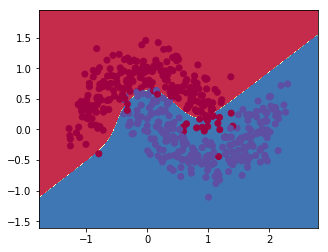

In [18]:
plot_decision_boundary(net)